In [1]:
import pandas as pd
import numpy as np

# from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import PlotFunctions as plt_func

# Read-in data

In [2]:
data_path = "data/"
raw_data = pd.read_csv(data_path+"PreprocessedData.csv")
raw_data.head()

,long_term_incentive,expenses,exercised_stock_options,from_messages,salary,director_fees,total_payments,restricted_stock,from_poi_to_this_person,from_this_person_to_poi,total_stock_value,bonus,restricted_stock_deferred,loan_advances,shared_receipt_with_poi,other,deferred_income,deferral_payments,to_messages,poi
0,6.014683e+05,94299.000000,7.028848e+04,29.000000,365788.000000,-64655.732317,1.061827e+06,585062.0,38.000000,1.000000,585062.0,6.000000e+05,-193793.677515,4.630382e+05,702.000000,1.740000e+03,-3.461064e+05,6.721188e+05,807.000000,0
1,1.586055e+06,11200.000000,6.680544e+06,164.753899,267102.000000,-430621.042747,5.634343e+06,3942714.0,56.413198,28.933870,10623258.0,1.200000e+06,-940973.370563,-1.596879e+06,1176.660115,2.660303e+06,-1.386055e+06,1.295738e+06,2044.753799,0
2,7.048456e+05,78552.000000,4.890344e+06,331.441137,170941.000000,-344656.989586,2.117250e+05,1788391.0,19.725056,35.947447,6678735.0,3.500000e+05,-652461.180483,-2.994088e+06,802.773152,1.296100e+04,-4.007290e+05,2.168573e+05,1584.942531,0
3,6.509995e+05,55059.034147,6.518500e+05,12.000000,258905.589817,71994.265873,2.631959e+06,386335.0,10.000000,0.000000,1038185.0,1.002262e+06,-109238.661886,1.550418e+06,58.000000,3.256998e+05,-6.023013e+05,7.731638e+05,764.000000,0
4,1.617011e+06,34039.000000,5.538001e+06,32.000000,243293.000000,268781.017631,2.886820e+05,853064.0,32.000000,21.000000,6391065.0,1.500000e+06,-946311.847443,-6.281539e+06,1035.000000,1.135000e+04,-3.117011e+06,2.163069e+06,1045.000000,1


In [3]:
features = raw_data.iloc[:,:-1]
targets  = raw_data.iloc[:,-1:]

In [4]:
features.head()

,long_term_incentive,expenses,exercised_stock_options,from_messages,salary,director_fees,total_payments,restricted_stock,from_poi_to_this_person,from_this_person_to_poi,total_stock_value,bonus,restricted_stock_deferred,loan_advances,shared_receipt_with_poi,other,deferred_income,deferral_payments,to_messages
0,6.014683e+05,94299.000000,7.028848e+04,29.000000,365788.000000,-64655.732317,1.061827e+06,585062.0,38.000000,1.000000,585062.0,6.000000e+05,-193793.677515,4.630382e+05,702.000000,1.740000e+03,-3.461064e+05,6.721188e+05,807.000000
1,1.586055e+06,11200.000000,6.680544e+06,164.753899,267102.000000,-430621.042747,5.634343e+06,3942714.0,56.413198,28.933870,10623258.0,1.200000e+06,-940973.370563,-1.596879e+06,1176.660115,2.660303e+06,-1.386055e+06,1.295738e+06,2044.753799
2,7.048456e+05,78552.000000,4.890344e+06,331.441137,170941.000000,-344656.989586,2.117250e+05,1788391.0,19.725056,35.947447,6678735.0,3.500000e+05,-652461.180483,-2.994088e+06,802.773152,1.296100e+04,-4.007290e+05,2.168573e+05,1584.942531
3,6.509995e+05,55059.034147,6.518500e+05,12.000000,258905.589817,71994.265873,2.631959e+06,386335.0,10.000000,0.000000,1038185.0,1.002262e+06,-109238.661886,1.550418e+06,58.000000,3.256998e+05,-6.023013e+05,7.731638e+05,764.000000
4,1.617011e+06,34039.000000,5.538001e+06,32.000000,243293.000000,268781.017631,2.886820e+05,853064.0,32.000000,21.000000,6391065.0,1.500000e+06,-946311.847443,-6.281539e+06,1035.000000,1.135000e+04,-3.117011e+06,2.163069e+06,1045.000000


In [5]:
targets.head()

,poi
0,0
1,0
2,0
3,0
4,1


In [6]:
# Flatten targets data
targets = np.ravel(targets)

# ML

In [7]:
# Scorer for GridSearchCV
scorer = make_scorer(accuracy_score) 

### RandomForrest

In [8]:
hyper_parameters_RF = {"n_estimators": [100,125,150,200,220,250,270,275],
                       "min_samples_split": [3,4,5]
                      }
#260,2
# Create GridSearchCV object
grid_RF = GridSearchCV(RandomForestClassifier(),cv=10, param_grid=hyper_parameters_RF, scoring=scorer)
fit_grid_RF = grid_RF.fit(features,targets) # fit grid to our training data
clf_RF = fit_grid_RF.best_estimator_ # save the best performing classifier to variable

print("Best Hyper-parameters: \n", grid_RF.best_params_)
print("\n--------------------------------------------------------------------------------------------------\n")
print("Model after hyper-parameter tuning: \n",grid_RF.best_estimator_)

Best Hyper-parameters: 
 {'min_samples_split': 3, 'n_estimators': 150}

--------------------------------------------------------------------------------------------------

Model after hyper-parameter tuning: 
 RandomForestClassifier(min_samples_split=3, n_estimators=150)


In [9]:
# Cross-Validate the best classifier
scores_RF = cross_val_score(clf_RF, features, targets, cv=10)

print("\nAccuracy: ",scores_RF.mean())


Accuracy:  0.8766666666666667


### AdaBoost

In [10]:
# Set hyperparameters to test
hyper_parameters_AB = {"n_estimators": [25,50,100,125,150],
                       "base_estimator": [DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3),RandomForestClassifier(max_depth=2),RandomForestClassifier(max_depth=4)]
                      }
# Create GridSearchCV object
grid_AB = GridSearchCV(AdaBoostClassifier(), param_grid=hyper_parameters_AB, scoring=scorer)
fit_grid_AB = grid_AB.fit(features,targets) # fit grid to our training data
clf_AB = fit_grid_AB.best_estimator_ # save the best performing classifier to variable

print("Best Hyper-parameters: \n", grid_AB.best_params_)
print("\n--------------------------------------------------------------------------------------------------\n")
print("Model after hyper-parameter tuning: \n",grid_AB.best_estimator_)

Best Hyper-parameters: 
 {'base_estimator': DecisionTreeClassifier(max_depth=3), 'n_estimators': 100}

--------------------------------------------------------------------------------------------------

Model after hyper-parameter tuning: 
 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=100)


In [11]:
# Cross-Validate the best classifier
scores_AB = cross_val_score(clf_AB, features, targets, cv=10)

print("\nAccuracy: ",scores_AB.mean())


Accuracy:  0.8695238095238096


## PCA

Check scatter plots of features against features to see if they can be linearly combined by PCA.

We'll also look at the targets as two different colors and see if we can find a pattern

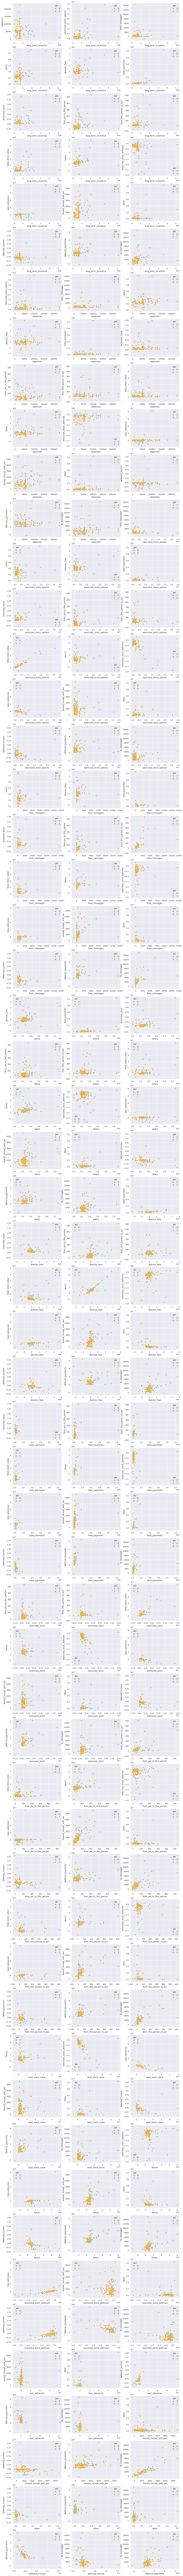

In [7]:
plt_func.PlotFeatures(raw_data)

It looks like some of the features are linearly related, like salary and total_payments (makes sense), so let's try to use PCA

In [ ]:
pca = PCA(n_components=2)
pca_fit = pca.fit(features)
pca_features = pca_fit.transform(features)
# pca_test = pca_fit.transform(features_test)

In [ ]:
# Set hyperparameters to test
hyper_parameters_pca_AB = {"n_estimators": [25,50,100,125,150],
                       "base_estimator": [DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3),RandomForestClassifier(max_depth=2),RandomForestClassifier(max_depth=4)]
                      }
# Create GridSearchCV object
grid_pca_AB = GridSearchCV(AdaBoostClassifier(), param_grid=hyper_parameters_pca_AB, scoring=scorer)
fit_grid_pca_AB = grid_pca_AB.fit(pca_features,targets) # fit grid to our training data
clf_pca_AB = fit_grid_pca_AB.best_estimator_ # save the best performing classifier to variable

print("Best Hyper-parameters: \n", grid_pca_AB.best_params_)
print("\n--------------------------------------------------------------------------------------------------\n")
print("Model after hyper-parameter tuning: \n",grid_pca_AB.best_estimator_)

In [ ]:
# Cross-Validate the best classifier
scores_pca_AB = cross_val_score(clf_pca_AB, pca_features, targets, cv=10)

print("\nAccuracy: ",scores_pca_AB.mean())